In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
x,y=load_boston(return_X_y=True)

In [3]:
x_train=np.ones((len(x[:400]),x.shape[1]+1))
x_train[:400,1:]=x[:400,:]
y_train=y[:400]

In [4]:
x_test=np.ones((len(x[400:]),x.shape[1]+1))
x_test[:,1:]=x[400:,:]
y_test=y[400:]

In [5]:
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [6]:
epochs=3000
lr=1e-5
m=len(x_train)
m_test=len(x_test)
lam=10

In [7]:
los=[]
los_test=[]
theta=np.zeros((x_train.shape[1],))

for i in range(epochs):
    y_pred=(np.dot(x_train,theta))
    y_pred_test=np.dot(x_test,theta)
    loss=(((y_train-y_pred)**2)/(2*m))
    loss_test=((y_test-y_pred_test)**2)/(2*m_test)
    los.append(np.sum(loss)+(lam/(2*m))*np.sum((theta**2)))
    los_test.append(np.sum(loss_test)+(lam/(2*m))*np.sum((theta**2)))

    n=x_train.shape[1]
    temp = np.zeros(theta.shape)

    for j in range(1,n):
        temp[j]=theta[j]*(1-((lr*lam)/m))-(lr/m)*np.sum((np.dot(y_pred-y_train,x_train[:,j])))
    theta[1:]=temp[1:]
    theta[0]=theta[0]-(lr/m)*np.sum((np.dot(y_pred-y_train,x_train[:,j])))

In [8]:
y_pred=np.dot(x_train,theta)
y_pred_test=np.dot(x_test,theta)

In [9]:
print('Training error: ',round(mean_absolute_error(y_train,y_pred),2))
print('Testing error: ',(round(mean_absolute_error(y_test,y_pred_test),2)))

Training error:  13.92
Testing error:  5.37


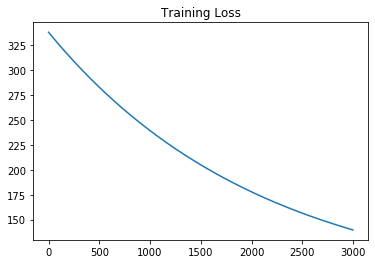

In [10]:
plt.title('Training Loss')
plt.plot(range(epochs),los)

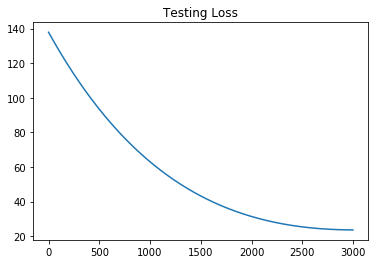

In [11]:
plt.title('Testing Loss')
plt.plot(range(epochs),los_test)